# GW Example

## v2 -- Refactor with localization

In [1]:
%matplotlib notebook

In [12]:
# imports
from importlib import reload
import os
from pkg_resources import resource_filename
import numpy as np

import healpy as hp
import pandas

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord

from astropath import bayesian
from astropath import localization

# LIGO example -- GW170817

In [2]:
lfile = os.path.join(resource_filename('astropath', 'data'), 'gw_examples', 
                     'GW170817_skymap.fits.gz')

In [3]:
gw170817 = hp.read_map(lfile)

/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:486: UserWarning: O

In [4]:
header = fits.open(lfile)[1].header
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =             12582912 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'PROB    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'pix-1   '                                                            
TTYPE2  = 'DISTMU  '                                                            
TFORM2  = 'D       '        

/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/xavier/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify

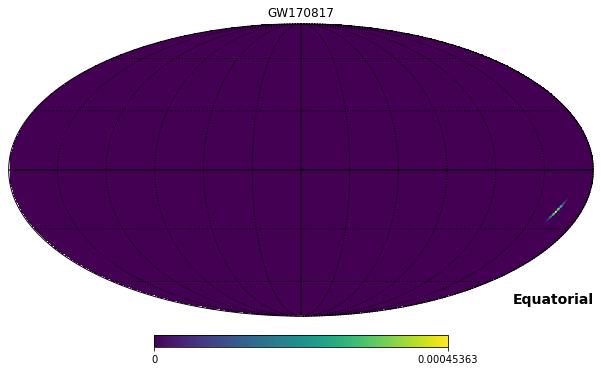

In [5]:
hp.mollview(
    gw170817,
    coord=["C"],
    title="GW170817",
    #unit="mK",
    #norm="hist",
    #min=-1,
    #max=1,
)
hp.graticule()

## Galaxies
    https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=VII/275

In [10]:
galfile = os.path.join(resource_filename('astropath', 'data'), 'gw_examples', 
                     'GW170817_galaxies.csv')

In [15]:
cut_galaxies = pandas.read_csv(galfile, index_col=0)

In [16]:
cut_galaxies.head()

,RAJ2000,DEJ2000,Dist,Bmag,BmagHyp,ImagHyp,modzHyp,mod0Hyp,logd25Hyp,logr25Hyp,...,BmagGWGC,maj,min,PAGWGC,DistGWGC,Kmag2MPZ,Bmag2MPZ,zsp2MPZ,zph2MPZ,Flag
667013,357.169220,-2.362345,92.028,15.33,15.81,14.02,34.92,NaN,0.85,0.19,...,15.33,0.708,0.457,136.2,92.028,12.761,15.622,0.02219,0.031973,0
667018,150.132019,-31.244976,31.583,12.60,12.95,10.66,32.62,NaN,1.31,0.15,...,12.60,2.042,1.446,179.9,31.583,8.792,12.490,0.00813,0.008867,0
667030,76.325119,-9.147248,44.347,12.53,13.03,10.86,33.33,NaN,1.43,0.35,...,12.53,1.816,0.890,112.0,44.347,8.818,12.735,0.01090,0.010972,0
667044,338.249908,-20.094194,80.264,14.13,14.43,13.35,34.57,NaN,1.05,0.03,...,14.13,0.830,0.772,NaN,80.264,12.792,14.575,0.01905,0.011343,0
667076,138.796539,29.252758,88.167,16.19,17.13,NaN,34.83,NaN,0.72,0.46,...,16.19,0.525,0.182,2.4,88.167,13.127,16.320,0.02080,0.062994,0


### Coordinates

In [17]:
cut_gal_coord = SkyCoord(ra=cut_galaxies.RAJ2000, dec=cut_galaxies.DEJ2000, unit='deg')

In [19]:
ngc_4993 = SkyCoord('13h09m47.706s -23d23m01.79s', frame='icrs')

In [20]:
np.min(ngc_4993.separation(cut_gal_coord).to('arcmin'))

<Angle 6.9681154e-05 arcmin>

In [21]:
np.argmin(ngc_4993.separation(cut_gal_coord))

11

In [22]:
cut_galaxies.iloc[11]

RAJ2000      197.448776
DEJ2000      -23.383831
Dist          33.806000
Bmag          12.870000
BmagHyp       13.450000
ImagHyp       11.310000
modzHyp       33.130000
mod0Hyp             NaN
logd25Hyp      1.190000
logr25Hyp      0.060000
logdcHyp       1.260000
PAHyp        173.200000
BmagHypC      12.870000
ImagHypC      11.080000
U-BHypC             NaN
B-VHypC             NaN
Jmag2         10.292000
Hmag2          9.599000
Kmag2          9.330000
a_b            0.900000
PAK          -20.000000
BmagGWGC      12.870000
maj            0.932000
min            0.792000
PAGWGC       173.200000
DistGWGC      33.806000
Kmag2MPZ       9.285000
Bmag2MPZ      13.160000
zsp2MPZ        0.009680
zph2MPZ        0.012307
Flag           0.000000
Name: 667145, dtype: float64

# PATH time

## Priors

In [23]:
offset_prior = dict(method='exp', 
                   max=6., # units of ang_size
                   ang_size=cut_galaxies.maj.values*60., # arcsec
                  )
priors = dict(offset=offset_prior, 
              O='inverse', 
              U=0., 
              name='Adopted')

### Raw

In [24]:
raw_prior_Oi = bayesian.raw_prior_Oi(priors['O'],
                                     cut_galaxies.Bmag.values)
cut_galaxies['P_O_raw'] = raw_prior_Oi

### Normalize

In [25]:
cut_galaxies['P_O'] = bayesian.renorm_priors(cut_galaxies.P_O_raw.values, priors['U'])

## Calculate $p(x|O)$

## Localization

In [26]:
localiz = dict(type='healpix',
               healpix_data=gw170817,
               healpix_nside=header['NSIDE'],
               healpix_ordering='NESTED',
               healpix_coord='C')
assert localization.vette_localization(localiz)

In [27]:
reload(bayesian)
p_xOi = bayesian.px_Oi_local(localiz, 
                      cut_gal_coord, offset_prior)#, debug=True)

In [28]:
cut_galaxies['p_xO'] = p_xOi

## $p(x)$

In [29]:
p_x = np.sum(cut_galaxies.P_O * cut_galaxies.p_xO)
p_x

0.00033370749677562306

## Posteriors $P(O|x)$

In [30]:
P_Oix = cut_galaxies.P_O * p_xOi / p_x
cut_galaxies['P_Ox'] = P_Oix

In [31]:
cut_galaxies[['RAJ2000', 'DEJ2000', 'Bmag', 'maj', 'P_O', 'p_xO', 'P_Ox']].sort_values('P_Ox', ascending=False)

,RAJ2000,DEJ2000,Bmag,maj,P_O,p_xO,P_Ox
667145,197.448776,-23.383831,12.87,0.932,0.006478,5.151239e-02,9.999950e-01
668837,193.861099,-20.892786,15.73,0.776,0.000128,1.295437e-05,4.952312e-06
667931,194.469193,-22.638481,15.52,1.047,0.000167,5.217267e-09,2.614253e-09
671560,206.735901,-39.884365,14.88,0.757,0.000388,2.236647e-11,2.600846e-11
670857,192.973251,-12.604387,16.27,0.468,0.000064,4.714698e-11,9.103227e-12
...,...,...,...,...,...,...,...
668699,180.701767,21.145529,16.00,0.871,0.000090,0.000000e+00,0.000000e+00
668667,110.026970,53.010151,14.28,0.757,0.000875,0.000000e+00,0.000000e+00
668650,140.950027,2.112878,15.07,0.630,0.000301,0.000000e+00,0.000000e+00
668626,21.381145,32.136272,13.63,1.582,0.002167,0.000000e+00,0.000000e+00


## F'ing A

----

# Multi order
    https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html

In [28]:
mofile = os.path.join(resource_filename('astropath', 'data'), 'gw_examples', 
                     'GW190814_PublicationSamples.multiorder.fits')

----